## Import packages

In [99]:
import numpy as np
import pandas as pd
from vecstack import stacking
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RandomizedLasso
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge

## Step I. Load data

In [3]:
train = pd.read_csv('train.csv')
X_test = pd.read_csv('X_test.csv')

X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

## Step II. Perform stacking

In [4]:
def modelfit(reg, train, target, performCV=True, cv=10):
    reg.fit(train, target)
    pred = reg.predict(train)
    train_r2_score = r2_score(target, pred)
    
    print('\nModel Report')
    print('Train_coef_of_det: %0.6f' %(train_r2_score))
    
    if performCV:
        cv_r2_score = cross_val_score(reg, train, target, cv=cv, scoring='r2', n_jobs=-1)
        print('CV_coef_of_det: Mean-%0.6f | Std-%0.6f | Min-%0.6f | Max-%0.6f' %(np.mean(cv_r2_score),
            np.std(cv_r2_score), np.min(cv_r2_score), np.max(cv_r2_score)))

### Function for standardization

In [5]:
def standardize(train, test):
    scaler = StandardScaler().fit(train)
    train = pd.DataFrame(scaler.transform(train), columns=train.columns)
    test = pd.DataFrame(scaler.transform(test), columns=train.columns)
    return (train, test)

### Base models

In [7]:
params = {'reg_alpha': 0.2488306517953651, 'colsample_bylevel': 0.408428905857428,
          'scale_pos_weight': 0.9984620415066895, 'learning_rate': 0.1, 'max_delta_step': 0, 'base_score': 0.5,
          'n_estimators': 1070, 'seed': 10, 'colsample_bytree': 0.9489607182872746, 'silent': False, 'missing': None,
          'nthread': -1, 'min_child_weight': 0.3, 'subsample': 0.9844783382327149, 'reg_lambda': 0.9993727646886654,
          'objective': 'reg:linear', 'max_depth': 3, 'gamma': 2.5777502101292433}
reg1 = XGBRegressor(
                    learning_rate = params['learning_rate'],
                    n_estimators = params['n_estimators'],
                    max_depth = params['max_depth'],
                    gamma = params['gamma'],                        
                    max_delta_step = params['max_delta_step'],
                    min_child_weight = params['min_child_weight'],
                    subsample = params['subsample'],
                    colsample_bytree = params['colsample_bytree'],
                    colsample_bylevel = params['colsample_bylevel'],
                    reg_alpha = params['reg_alpha'],
                    reg_lambda = params['reg_lambda'],
                    scale_pos_weight = params['scale_pos_weight'],
                    base_score = params['base_score'],
                    objective = params['objective'],
                    silent = params['silent'],
                    nthread = params['nthread'],
                    seed = params['seed'],
                    missing = params['missing']                  
                    )

In [8]:
params = {'warm_start': True, 'verbose': 0, 'max_leaf_nodes': None, 'learning_rate': 0.1, 'min_samples_leaf': 2,
          'n_estimators': 220, 'max_features': 0.9827404178094029, 'alpha': 0.16846758069342863, 'presort': True,
          'loss': 'ls', 'min_impurity_split': 1e-07, 'subsample': 0.9800365433265062, 'init': None,
          'min_weight_fraction_leaf': 0.000546805267271948, 'criterion': 'friedman_mse', 'random_state': 10,
          'min_samples_split': 9, 'max_depth': 3}
reg2 = GradientBoostingRegressor(
                                learning_rate = params['learning_rate'],
                                n_estimators = params['n_estimators'],
                                max_depth = params['max_depth'],
                                subsample = params['subsample'],
                                max_features = params['max_features'],
                                alpha = params['alpha'],
                                min_samples_split = params['min_samples_split'],
                                min_samples_leaf = params['min_samples_leaf'],
                                min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                                min_impurity_split = params['min_impurity_split'],
                                presort = params['presort'],
                                loss = params['loss'],
                                criterion = params['criterion'],
                                init = params['init'],
                                verbose = params['verbose'],
                                max_leaf_nodes = params['max_leaf_nodes'],
                                warm_start = params['warm_start'],
                                random_state = params['random_state']
                                )

In [9]:
params = {'warm_start': True, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': None,
          'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 140, 'max_features': 0.7,
          'min_weight_fraction_leaf': 0.0, 'criterion': 'mse', 'random_state': 10, 'min_impurity_split': 0,
          'min_samples_split': 3, 'max_depth': None}
reg3 = ExtraTreesRegressor(
                            n_estimators = params['n_estimators'],
                            max_depth = params['max_depth'],
                            max_features = params['max_features'],
                            min_samples_split = params['min_samples_split'],
                            min_samples_leaf = params['min_samples_leaf'],
                            min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                            min_impurity_split = params['min_impurity_split'],
                            bootstrap = params['bootstrap'],
                            oob_score = params['oob_score'],
                            max_leaf_nodes = params['max_leaf_nodes'],
                            criterion = params['criterion'],
                            n_jobs = params['n_jobs'],
                            warm_start = params['warm_start'],
                            verbose = params['verbose'],
                            random_state = params['random_state']
                            )

In [10]:
reg4 = RandomForestRegressor(n_estimators=70, max_depth=None, max_features=0.52,
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, 
        bootstrap=True, criterion='mse', oob_score=False, max_leaf_nodes=None, n_jobs=-1,
        verbose=0, warm_start=False, random_state=10)

In [11]:
params = {'warm_start': True, 'max_samples': 0.9030810827110213, 'base_estimator': None, 'n_jobs': 1,
          'verbose': 0, 'bootstrap': False, 'oob_score': False, 'n_estimators': 110, 'random_state': 10,
          'max_features': 0.5351477142010489, 'bootstrap_features': False}
reg5 = BaggingRegressor(
                        n_estimators = params['n_estimators'],
                        max_samples = params['max_samples'],
                        max_features = params['max_features'],
                        bootstrap = params['bootstrap'],
                        bootstrap_features = params['bootstrap_features'],
                        oob_score = params['oob_score'],
                        base_estimator = params['base_estimator'],
                        warm_start = params['warm_start'],
                        verbose = params['verbose'],
                        n_jobs = params['n_jobs'],
                        random_state = params['random_state']  
                        )

In [12]:
params = {'n_estimators': 517, 'loss': 'exponential', 'base_estimator': None, 'random_state': 10,
          'learning_rate': 0.1}
reg6 = AdaBoostRegressor(
                        learning_rate = params['learning_rate'],
                        n_estimators = params['n_estimators'],
                        loss = params['loss'],
                        base_estimator = params['base_estimator'],
                        random_state = params['random_state']
                        )

In [13]:
params = {'normalize': False, 'warm_start': True, 'selection': 'cyclic', 'fit_intercept': True,
          'l1_ratio': 0.4779542082285552, 'max_iter': 25, 'precompute': True, 'random_state': 10,
          'tol': 0.0010509356563245678, 'positive': False, 'copy_X': False, 'alpha': 0.840377112882823}
reg7 = ElasticNet(
                    alpha = params['alpha'],
                    l1_ratio = params['l1_ratio'],
                    normalize = params['normalize'],
                    precompute = params['precompute'],
                    max_iter = params['max_iter'],
                    tol = params['tol'],
                    positive = params['positive'],
                    selection = params['selection'],
                    warm_start = params['warm_start'],
                    random_state = params['random_state']   
                    )

In [14]:
params = {'normalize': False, 'n_iter': 7, 'verbose': True, 'lambda_2': 0.004900097067640188,
          'fit_intercept': True, 'compute_score': False, 'alpha_2': 0.010070176141440748, 'tol': 0.4475451681770408,
          'alpha_1': 5.828472650020041e-12, 'copy_X': True, 'lambda_1': 0.0011557992166094178}
reg8 = BayesianRidge(
                    alpha_1 = params['alpha_1'],
                    alpha_2 = params['alpha_2'],
                    lambda_1 = params['lambda_1'],
                    lambda_2 = params['lambda_2'],
                    n_iter = params['n_iter'],
                    tol = params['tol'],
                    compute_score = params['compute_score'],
                    normalize = params['normalize'],
                    fit_intercept = params['fit_intercept'],
                    copy_X = params['copy_X'],
                    verbose = params['verbose']
                    )

In [15]:
params = {'normalize': True, 'warm_start': False, 'selection': 'random', 'fit_intercept': True, 'positive': True,
          'max_iter': 17, 'precompute': False, 'random_state': 10, 'tol': 0.046776741099351975, 'copy_X': True,
          'alpha': 0.9933646228467098}
reg9 = Lasso(
            alpha = params['alpha'],
            max_iter = params['max_iter'],
            tol = params['tol'],
            normalize = params['normalize'],
            precompute = params['precompute'],
            positive = params['positive'],
            selection = params['selection'],
            fit_intercept = params['fit_intercept'],
            copy_X = params['copy_X'],
            warm_start = params['warm_start'],
            random_state = params['random_state']
            )

In [16]:
params = {'normalize': False, 'alphas': None, 'n_jobs': -1, 'verbose': False, 'positive': True, 'n_alphas': 2,
          'max_iter': 14, 'eps': 0.019137796428146392, 'precompute': True, 'random_state': 10,
          'tol': 0.05672233404835849, 'selection': 'cyclic', 'cv': 10}
reg10 = LassoCV(
            eps = params['eps'],
            n_alphas = params['n_alphas'],
            max_iter = params['max_iter'],
            tol = params['tol'],
            normalize = params['normalize'],
            positive = params['positive'],
            precompute = params['precompute'],
            selection = params['selection'],
            alphas = params['alphas'],
            cv = params['cv'],
            n_jobs = params['n_jobs'],
            verbose = params['verbose'],
            random_state = params['random_state']       
            )

In [17]:
params = {'normalize': False, 'fit_path': False, 'fit_intercept': True, 'positive': True, 'max_iter': 116,
          'eps': 0.9766195535161404, 'precompute': 'auto', 'copy_X': True, 'alpha': 0.44414494003332533,
          'verbose': False}
reg11 = LassoLars()
'''
            alpha = params['alpha'],
            max_iter = params['max_iter'],
            eps = params['eps'],
            normalize = params['normalize'],
            precompute = params['precompute'],
            fit_path = params['fit_path'],
            positive = params['positive'],
            fit_intercept = params['fit_intercept'],
            copy_X = params['copy_X'],
            verbose = params['verbose']          
            )
'''

"\n            alpha = params['alpha'],\n            max_iter = params['max_iter'],\n            eps = params['eps'],\n            normalize = params['normalize'],\n            precompute = params['precompute'],\n            fit_path = params['fit_path'],\n            positive = params['positive'],\n            fit_intercept = params['fit_intercept'],\n            copy_X = params['copy_X'],\n            verbose = params['verbose']          \n            )\n"

In [18]:
params = {'normalize': True, 'fit_intercept': True, 'max_iter': 44, 'random_state': 10, 'tol': 0.13201162619710619,
          'copy_X': True, 'alpha': 0.2815809154477012, 'solver': 'sag'}
reg12 = Ridge()
'''
            alpha = params['alpha'],
            tol = params['tol'],
            solver = params['solver'],
            max_iter = params['max_iter'],
            normalize = params['normalize'], 
            fit_intercept = params['fit_intercept'],
            copy_X = params['copy_X'],
            random_state = params['random_state']         
            )
'''

"\n            alpha = params['alpha'],\n            tol = params['tol'],\n            solver = params['solver'],\n            max_iter = params['max_iter'],\n            normalize = params['normalize'], \n            fit_intercept = params['fit_intercept'],\n            copy_X = params['copy_X'],\n            random_state = params['random_state']         \n            )\n"

In [19]:
base_models = [reg1, reg2, reg3, reg4, reg5, reg6, reg7, reg8, reg9, reg10, reg11, reg12]

### Compute stacking features

In [20]:
S_train, S_test = stacking(base_models, X_train.values, y_train, X_test.values, regression=True, metric=r2_score,
                           n_folds=10, shuffle=True, random_state=10, verbose=2)

task:   [regression]
metric: [r2_score]

model 0: [XGBRegressor]
    fold 0: [0.90896434]
    fold 1: [0.90402461]
    fold 2: [0.89997364]
    fold 3: [0.93228209]
    fold 4: [0.90538117]
    fold 5: [0.92757486]
    fold 6: [0.86161071]
    fold 7: [0.70196644]
    fold 8: [0.89696104]
    fold 9: [0.89857591]
    ----
    MEAN:   [0.88985104]

model 1: [GradientBoostingRegressor]
    fold 0: [0.90604988]
    fold 1: [0.97741298]
    fold 2: [0.97502524]
    fold 3: [0.98749939]
    fold 4: [0.97835686]
    fold 5: [0.98791256]
    fold 6: [0.98192464]
    fold 7: [0.97779665]
    fold 8: [0.98617421]
    fold 9: [0.97378918]
    ----
    MEAN:   [0.97515872]

model 2: [ExtraTreesRegressor]
    fold 0: [0.90194822]
    fold 1: [0.99976114]
    fold 2: [0.99988630]
    fold 3: [0.99971979]
    fold 4: [0.99965527]
    fold 5: [0.99970676]
    fold 6: [0.99974496]
    fold 7: [0.99977908]
    fold 8: [0.99965918]
    fold 9: [0.99966845]
    ----
    MEAN:   [0.99134175]

model 3: [Ra

/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:303: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/ensemble/bagging.py:346: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "



    fold 1: [0.99866691]
    fold 2: [0.99807115]
    fold 3: [0.99878555]
    fold 4: [0.99843933]
    fold 5: [0.99906506]
    fold 6: [0.99796768]
    fold 7: [0.99652284]
    fold 8: [0.99843837]
    fold 9: [0.99851263]
    ----
    MEAN:   [0.98900714]

model 5: [AdaBoostRegressor]
    fold 0: [0.83926228]
    fold 1: [0.82361600]
    fold 2: [0.81117718]
    fold 3: [0.88059038]
    fold 4: [0.77589038]
    fold 5: [0.81446006]
    fold 6: [0.81027561]
    fold 7: [0.66767998]
    fold 8: [0.84100397]
    fold 9: [0.80461747]
    ----
    MEAN:   [0.81501109]

model 6: [ElasticNet]
    fold 0: [0.89904515]
    fold 1: [0.88881226]
    fold 2: [0.87984474]
    fold 3: [0.87073242]
    fold 4: [0.85813890]
    fold 5: [0.86031598]
    fold 6: [0.47696048]
    fold 7: [0.74599437]
    fold 8: [0.81748847]
    fold 9: [0.79909940]
    ----
    MEAN:   [0.81970670]

model 7: [BayesianRidge]
    fold 0: [0.90461652]
    fold 1: [0.89460976]
    fold 2: [0.87191725]
    fold 3: [0.890

/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 117 iterations, i.e. alpha=2.210e+01, with an active set of 105 regressors, and the smallest cholesky pivot element being 1.054e-08
  ConvergenceWarning)



    ----
    MEAN:   [0.80899250]

model 10: [LassoLars]
    fold 0: [0.74278155]

/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 170 iterations, i.e. alpha=1.105e+01, with an active set of 152 regressors, and the smallest cholesky pivot element being 2.107e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 205 iterations, i.e. alpha=6.120e+00, with an active set of 175 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 218 iterations, alpha=5.373e+00, previous alpha=5.346e+00, with an active set of 187 regressors.
  ConvergenceWa


    fold 1: [0.89354367]

/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 133 iterations, i.e. alpha=1.714e+01, with an active set of 125 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 135 iterations, i.e. alpha=1.642e+01, with an active set of 127 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 137 iterations, alpha=1.550e+01, previous alpha=1.544e+01, with an active set of 128 regressors.
  ConvergenceWa


    fold 2: [0.86244668]

/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 119 iterations, i.e. alpha=2.075e+01, with an active set of 115 regressors, and the smallest cholesky pivot element being 2.980e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 119 iterations, i.e. alpha=2.075e+01, with an active set of 115 regressors, and the smallest cholesky pivot element being 1.054e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 127 iterations, i.e. alpha=1.883e+01, with an active set of 123 regressors, and the smallest cholesky pivot element being 1.054e-08
  ConvergenceWarning)
/home/rake


    fold 3: [0.90470695]

/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 160 iterations, i.e. alpha=1.097e+01, with an active set of 152 regressors, and the smallest cholesky pivot element being 2.107e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 177 iterations, i.e. alpha=8.910e+00, with an active set of 165 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 182 iterations, i.e. alpha=8.682e+00, with an active set of 168 regressors, and the smallest cholesky pivot element being 3.161e-08
  ConvergenceWarning)
/home/rake


    fold 4: [0.79530016]

/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 143 iterations, i.e. alpha=1.472e+01, with an active set of 129 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 165 iterations, i.e. alpha=9.937e+00, with an active set of 149 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 169 iterations, i.e. alpha=8.985e+00, with an active set of 153 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
/home/rake


    fold 5: [0.82618345]

/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 103 iterations, i.e. alpha=2.668e+01, with an active set of 99 regressors, and the smallest cholesky pivot element being 2.980e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 112 iterations, alpha=2.430e+01, previous alpha=2.424e+01, with an active set of 107 regressors.
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 118 iterations, i.e. alpha=1.913e+01, with an active set of 110 regressors, and the smallest cholesky pivot element being 2.107e-08
  ConvergenceWar


    fold 6: [0.37438420]

/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 147 iterations, i.e. alpha=1.160e+01, with an active set of 135 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 154 iterations, i.e. alpha=1.048e+01, with an active set of 142 regressors, and the smallest cholesky pivot element being 2.107e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 154 iterations, i.e. alpha=1.048e+01, with an active set of 142 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
/home/rake


    fold 7: [0.65831684]

/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 125 iterations, i.e. alpha=1.923e+01, with an active set of 113 regressors, and the smallest cholesky pivot element being 2.107e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 134 iterations, i.e. alpha=1.672e+01, with an active set of 122 regressors, and the smallest cholesky pivot element being 2.107e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 139 iterations, i.e. alpha=1.605e+01, with an active set of 127 regressors, and the smallest cholesky pivot element being 2.107e-08
  ConvergenceWarning)
/home/rake


    fold 8: [0.87005596]

/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 127 iterations, i.e. alpha=1.665e+01, with an active set of 123 regressors, and the smallest cholesky pivot element being 1.825e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 140 iterations, i.e. alpha=1.442e+01, with an active set of 134 regressors, and the smallest cholesky pivot element being 1.054e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 162 iterations, i.e. alpha=1.064e+01, with an active set of 152 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
/home/rake


    fold 9: [0.70077752]
    ----
    MEAN:   [0.78469916]

model 11: [Ridge]
    fold 0: [0.52694459]
    fold 1: [0.66256973]
    fold 2: [0.41315969]
    fold 3: [0.91204567]
    fold 4: [0.79817002]
    fold 5: [0.89290129]
    fold 6: [0.42787744]
    fold 7: [0.59076862]
    fold 8: [0.85507136]
    fold 9: [0.64089062]
    ----
    MEAN:   [0.70547843]



/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 107 iterations, i.e. alpha=2.508e+01, with an active set of 103 regressors, and the smallest cholesky pivot element being 2.581e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 153 iterations, i.e. alpha=1.357e+01, with an active set of 137 regressors, and the smallest cholesky pivot element being 2.107e-08
  ConvergenceWarning)
/home/rakesh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 158 iterations, i.e. alpha=1.322e+01, with an active set of 142 regressors, and the smallest cholesky pivot element being 1.054e-08
  ConvergenceWarning)
/home/rake

In [22]:
S_train = pd.DataFrame(S_train)
S_test = pd.DataFrame(S_test)

In [23]:
corr = S_train.corr()
corr

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.965077,0.947201,0.981238,0.953121,0.957062,0.951760,0.947522,0.938456,0.946760,0.935264,0.896941
1,0.965077,1.000000,0.990538,0.952449,0.991875,0.931328,0.919014,0.915383,0.908127,0.913955,0.903717,0.871462
2,0.947201,0.990538,1.000000,0.936943,0.998635,0.913667,0.907911,0.904416,0.896951,0.901433,0.891399,0.861476
3,0.981238,0.952449,0.936943,1.000000,0.944956,0.971147,0.952984,0.947436,0.939521,0.951865,0.937440,0.899312
4,0.953121,0.991875,0.998635,0.944956,1.000000,0.920712,0.914185,0.910460,0.903443,0.908091,0.898758,0.868973
5,0.957062,0.931328,0.913667,0.971147,0.920712,1.000000,0.922930,0.917693,0.910878,0.926922,0.911023,0.872576
6,0.951760,0.919014,0.907911,0.952984,0.914185,0.922930,1.000000,0.996233,0.980765,0.982295,0.979110,0.929017
7,0.947522,0.915383,0.904416,0.947436,0.910460,0.917693,0.996233,1.000000,0.980309,0.975933,0.986984,0.943466
8,0.938456,0.908127,0.896951,0.939521,0.903443,0.910878,0.980765,0.980309,1.000000,0.984748,0.966085,0.939581
9,0.946760,0.913955,0.901433,0.951865,0.908091,0.926922,0.982295,0.975933,0.984748,1.000000,0.961291,0.912513


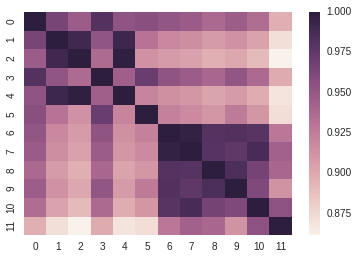

In [26]:
sns.heatmap(corr)

In [88]:
S_train_mod = S_train.iloc[:, [0,11]]
S_test_mod = S_test.iloc[:, [0,11]]

          0         11
0   1.000000  0.896941
11  0.896941  1.000000


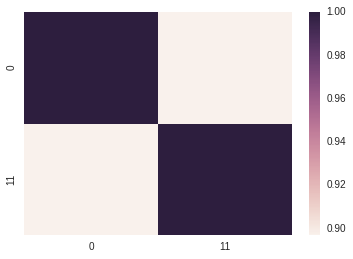

In [89]:
corr = S_train_mod.corr()
print corr
sns.heatmap(corr)

### Blend_model

In [90]:
S_train_mod, S_test_mod = standardize(S_train_mod, S_test_mod)

In [65]:
S_train_new = pd.concat([X_train, S_train_mod], axis=1)
S_test_new = pd.concat([X_test, S_test_mod], axis=1)

In [114]:
model = XGBRegressor()
modelfit(model, S_train_mod, np.log(y_train))


Model Report
Train_coef_of_det: 0.935751
CV_coef_of_det: Mean-0.891372 | Std-0.033337 | Min-0.826268 | Max-0.931707


### Make predictions and save results

In [118]:
test_pred = np.exp(model.predict(S_test_mod))
dictn = {'Id': range(1461,2920), 'SalePrice': test_pred}
res = pd.DataFrame(dictn)
res.to_csv('submission.csv', index=0)